### 보스턴 주택가격 회귀 구현  p.305~

In [2]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 데이터 로딩
boston = load_boston()

In [4]:
# 원래답(원래 주택가격)
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
boston.target.shape

(506,)

In [6]:
boston.data.shape

(506, 13)

In [9]:
# 데이터 프레임 생성
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
# 위 데이터프레임에 가격 추가
boston_df['PRICE']= boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
col = boston.feature_names
col

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

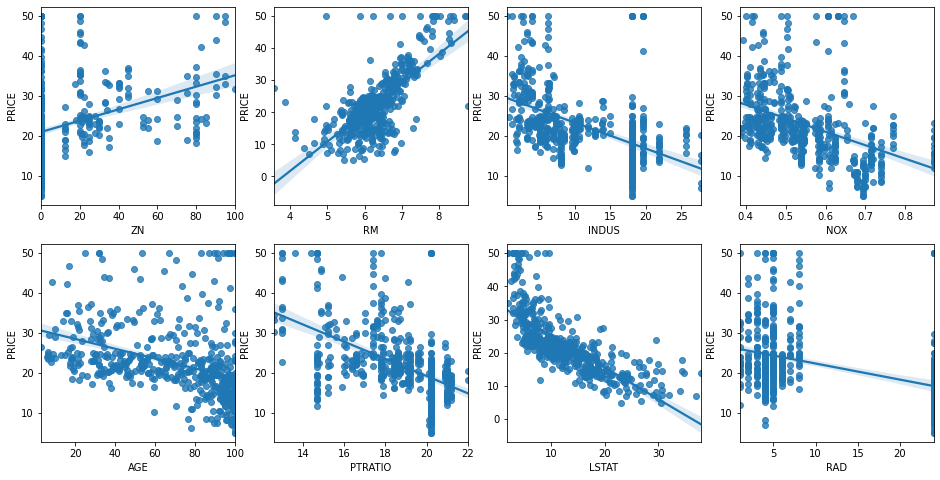

In [15]:
# 시각화 : 산점도(데이터 분포), 상관관계
# 8개의 feature 대상으로 target인 가격(PRICE)과의 관계를 시각화
# 8개의 축 필요
# 1장에 8개(2X4)의 축을 생성 : subplot()  -> fig, axes

fig, axs  = plt.subplots(
    figsize =(16,8)
    , ncols = 4
    , nrows = 2
)

# 그려낼 8개의 feature를 리스트에 저장
lm_features = ['ZN', 'RM', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT','RAD']

# seaborn의 regplot()을 이용해 산점도와 선형회귀 직선 표현
for idx, feature in enumerate(lm_features):
    row =  idx//4
    col =  idx % 4
    sns.regplot(x=feature, y='PRICE', data=boston_df
                , ax = axs[row][col]   # 표시할 축 지정
                , 
               )


시각화 결과, RM(거주할 수 있는 방 개수), LSAT(하위 계층의 비율) 컬럼의 가격 영향성이 큼을 알수 있다

### LinearRegression 클래스를 통해, 보스턴 주택가격 회귀모델 만들기

In [16]:
# 선형 회귀 구현
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
# DataFrame 내의 데이터 분리
# 데이터만 추출
X_data = boston_df.drop(
    ['PRICE']   # 삭제할 컬럼
    , axis = 1   # 삭제방향
    , inplace=False
)
# 답 분리
y_target = boston_df['PRICE']

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=156)

In [18]:
# 모델 객체 생성 / 학습 / 평가
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)

# 성능평가 : 오차 구하기
# 평균제곱오차 구하기
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))
print('r2 성능평가  :{0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 17.297, RMSE:4.159
r2 성능평가  :0.757


r2 값(결정계수)이 1에 가까울 수록 성능이 좋은 것이다. 0.757은 좋은 수치는 아니다. 추후에 다항회귀장에서 추가로 검증할 것 이다

In [23]:
# 계수, 절편 값 확인
#  f(x) = w0x0 + w1x1 + w2x2 + w3x3 +  .... + w12x12 + inter(절편)

intercept__= lr.intercept_
coef__ = lr.coef_
print('절편값 : ', intercept__)
print('회귀 계수값 :', np.round(coef__, 1))   # 피처 순서대로 회귀계수(가중치) 출력된다.

절편값 :  40.995595172164336
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [24]:
# 각 피처에 해당하는 회귀계수 출력
coeff = pd.Series(
      data=np.round(coef__,1)
    , index=X_data.columns
)
coeff

CRIM       -0.1
ZN          0.1
INDUS       0.0
CHAS        3.0
NOX       -19.8
RM          3.4
AGE         0.0
DIS        -1.7
RAD         0.4
TAX        -0.0
PTRATIO    -0.9
B           0.0
LSTAT      -0.6
dtype: float64

In [30]:
coeff.sort_values()

NOX       -19.8
DIS        -1.7
PTRATIO    -0.9
LSTAT      -0.6
CRIM       -0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
ZN          0.1
RAD         0.4
CHAS        3.0
RM          3.4
dtype: float64

앞서 실행한 시각화와 모두 일치하는 계수들은 아니다. => 최적화 수행이 필요함 => 교차검증하기

In [34]:
# cross_validation (교차 검증)
from sklearn.model_selection import cross_val_score

y_target=boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

lr= LinearRegression()

# 5개의 Fold로 검증
neg_mse_scores = cross_val_score(
      lr    # 적용할 모델
    , X_data   # 데이터 => X_train (원래 데이터 스플릿 후 학습데이터만 fold 해야 한다.)
    , y_target  # 답  => y_train
    , scoring='neg_mean_squared_error'
    , cv=5
)


In [35]:
# 위 cross val 기준으로 RMSE  출력
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [36]:
print('개별 Neg MSE scores : ', np.round(neg_mse_scores, 2))

개별 Neg MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]


In [38]:
print('개별 RMSE scores : ', np.round(rmse_scores, 2))

개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]


In [39]:
print('평균 RMSE score : ', np.round(avg_rmse,2) )

평균 RMSE score :  5.83


위 값에서 데이터의 의미를 찾기는 힘들다. 단지 오차값 지표들이 저런식으로 나온다라고만 확인하자.